<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [77]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [78]:
# Setup device-agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [79]:
# Create the data parameters
weight=0.3
bias=0.9

# Make X and y using linear regression feature
start=0
end=1
step=0.01  # 0-1/0.01=100 points
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X+bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [80]:
# Split the data into training and testing
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

print("x_train,y_train =",len(X_train),",",len(y_train))
print("x_test,y_test =",len(X_test),",",len(y_test))

x_train,y_train = 80 , 80
x_test,y_test = 20 , 20


In [81]:
# Plot the training and testing data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});




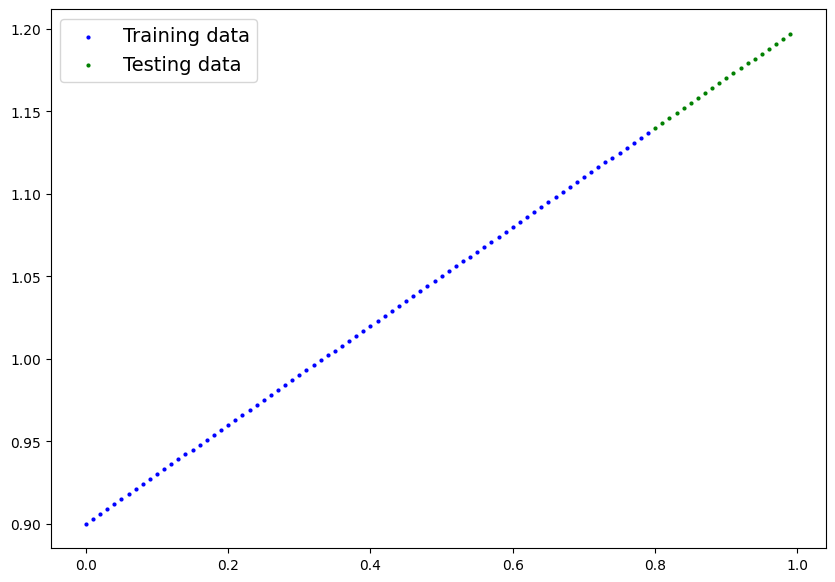

In [82]:
  plot_predictions();

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [83]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
   def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                    dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                           requires_grad=True)

   def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [84]:
# Instantiate the model and put it to the target device
model_0=LinearRegressionModel()
model_0.to(device)

LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [85]:
# Create the loss function and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [86]:
# Training loop
train_loss_values = []
test_loss_values = []
epoch_count = []

# Train model for 300 epochs
epochs=300

# Send data to target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass

  y_pred=model_0(X_train)

  # 2. Calculate loss

  loss=loss_fn(y_pred,y_train)
  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation

  loss.backward()
  # 5. Step the optimizer

  optimizer.step()
  # Put model in evaluation mode and setup inference context
  model_0.eval()
  with torch.inference_mode():
  # 1. Forward pass
    test_pred=model_0(X_test)
  # 2. Calculate test loss
    test_loss=loss_fn(test_pred,y_test.type(torch.float))

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().cpu().numpy())
    test_loss_values.append(test_loss.detach().cpu().numpy())
    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 3.563 | Test loss: 3.832
Epoch: 20 | Train loss: 3.332 | Test loss: 3.561
Epoch: 40 | Train loss: 3.101 | Test loss: 3.290
Epoch: 60 | Train loss: 2.870 | Test loss: 3.020
Epoch: 80 | Train loss: 2.638 | Test loss: 2.749
Epoch: 100 | Train loss: 2.407 | Test loss: 2.478
Epoch: 120 | Train loss: 2.176 | Test loss: 2.207
Epoch: 140 | Train loss: 1.945 | Test loss: 1.937
Epoch: 160 | Train loss: 1.714 | Test loss: 1.666
Epoch: 180 | Train loss: 1.482 | Test loss: 1.395
Epoch: 200 | Train loss: 1.251 | Test loss: 1.125
Epoch: 220 | Train loss: 1.020 | Test loss: 0.854
Epoch: 240 | Train loss: 0.789 | Test loss: 0.583
Epoch: 260 | Train loss: 0.558 | Test loss: 0.312
Epoch: 280 | Train loss: 0.326 | Test loss: 0.043


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [87]:
# Make predictions with the model
with torch.inference_mode():
    y_preds = model_0(X_test)
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")


Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[1.2520],
        [1.2610],
        [1.2700],
        [1.2790],
        [1.2880],
        [1.2970],
        [1.3060],
        [1.3150],
        [1.3240],
        [1.3330],
        [1.3420],
        [1.3510],
        [1.3600],
        [1.3690],
        [1.3780],
        [1.3871],
        [1.3961],
        [1.4051],
        [1.4141],
        [1.4231]], device='cuda:0')


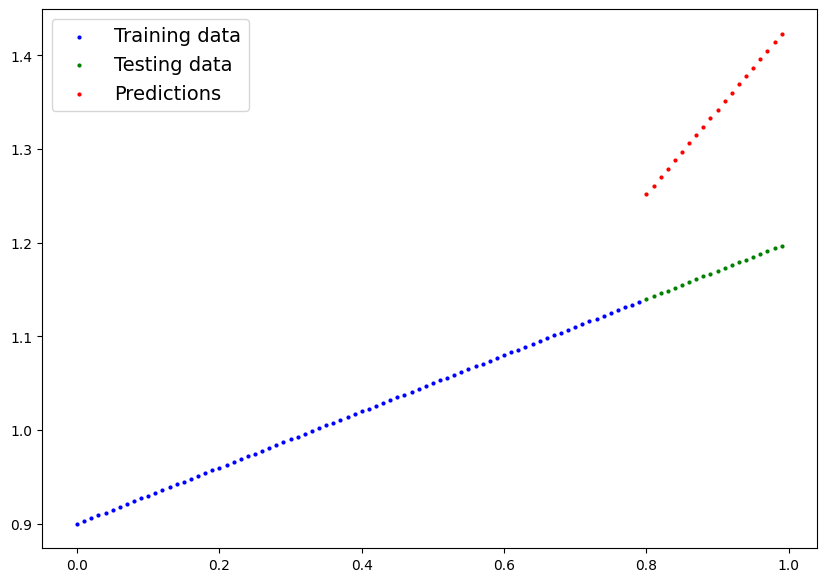

In [90]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [91]:
from pathlib import Path

# 1. Create models directory
MODEl_PATH=Path("model")
MODEl_PATH.mkdir(parents=True,exist_ok=True)
# 2. Create model save path
MODEL_NAME="model_0.pth"
MODEL_SAVE_PATH=MODEl_PATH/MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: model/model_0.pth


In [92]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model_1=LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cuda:0


In [93]:
# Make predictions with loaded model and compare them to the previous
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')